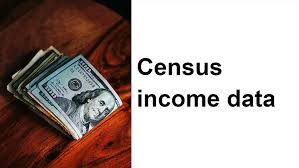

**LIBRARIES**

In [58]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


#Data Preprocessing:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Machine Learning Models:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Model Selection and Evaluation:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#Evaluation Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#Warnings:
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


#Data Preprocessing:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Machine Learning Models:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Model Selection and Evaluation:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#Evaluation Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#Warnings:
import warnings
warnings.filterwarnings('ignore')

Dataset from the specified file path

In [60]:
df= pd.read_csv('/content/drive/MyDrive/projects/census-income.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


CLEANING:strip string columns

In [61]:
for col in df.columns:
    if df[col].dtype in ['O']:
        df[col]=df[col].str.strip()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
for col in df.columns:
    num_unique = df[col].nunique()
    print(f"Number of unique values in column '{col}': {num_unique}")

Number of unique values in column 'age': 73
Number of unique values in column ' workclass': 9
Number of unique values in column ' fnlwgt': 21648
Number of unique values in column ' education': 16
Number of unique values in column ' education-num': 16
Number of unique values in column ' marital-status': 7
Number of unique values in column ' occupation': 15
Number of unique values in column ' relationship': 6
Number of unique values in column ' race': 5
Number of unique values in column ' sex': 2
Number of unique values in column ' capital-gain': 119
Number of unique values in column ' capital-loss': 92
Number of unique values in column ' hours-per-week': 94
Number of unique values in column ' native-country': 42
Number of unique values in column ' income': 2


This code iterates through the column names and removes any leading or trailing spaces using the

In [64]:
df.columns = df.columns.str.strip()

In [65]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Missing data handling

In [66]:
for columns in df.columns:
    print(f"{columns} : {df[columns].unique()}")

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302]
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'

In [67]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [68]:
#in "workclass" column having " ? ".it indicates missing data ..let us handle this first

In [69]:
df.replace("?",np.NaN, inplace=True)


In [70]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

"workclass (1836), occupation (1843), and native-country (583) have null values. If we plan to drop those values, we must ensure that the number of rows dropped does not exceed 4262, as some null values may intersect with other columns."

which columns have the most missing values, and to decide how to handle those missing values

In [71]:
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

occupation        1843
workclass         1836
native-country     583
dtype: int64

In [72]:
len(df[df['workclass'].isna() & df['occupation'].isna()])

1836

In [73]:
df[df['occupation'].isna() & ~df['workclass'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [74]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

"The Workclass column has 1836 rows with missing values, and the Occupation column has 1843 rows with missing values. However, the Occupation column has 7 more missing values than the Workclass column, likely because those individuals do not have an occupation. To handle these missing values, we can replace the missing Occupation values with 'No-occupation'."

In [75]:
df[df['workclass']=='Never-worked']= df[df['workclass']=='Never-worked'].fillna('No-occupation')

In [76]:
df['native-country'].value_counts()#[:5]

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [77]:
df['native-country'].fillna('United-States', inplace=True)

In [78]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
dtype: int64

In [79]:
df.dropna(inplace=True)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [80]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [81]:
# columns evaluation
# let observe columns "capital-gain","capital-loss"

Regarding the "capital-gain" and "capital-loss" columns, the search results do not provide any specific information about the number of missing values in those columns. The next step would be to evaluate those columns and determine if there are any missing values that need to be handled.

In [82]:
df["capital-gain"].value_counts()
 # 28136 data points having value 0


capital-gain
0        28136
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
2538         1
401          1
1455         1
1086         1
Name: count, Length: 118, dtype: int64

In [83]:
len_for_c_gain_0= (len(df[df["capital-gain"]==0])/len(df))*100
len_for_c_gain_0     # hogh contribution of 0

91.57363710333605

In [84]:
len_for_c_loss_0= (len(df[df["capital-loss"]==0])/len(df))*100
len_for_c_loss_0     # hogh contribution of 0

95.24491456468674

these two columns may give less accuracy so drop


In [85]:
df.drop(["capital-gain","capital-loss"],axis=1,inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [86]:
# let we see Native Country column

(df['native-country'].value_counts()/len(df))*100

native-country
United-States                 91.349064
Mexico                         1.985354
Philippines                    0.611880
Germany                        0.416599
Puerto-Rico                    0.354760
Canada                         0.348251
India                          0.325468
El-Salvador                    0.325468
Cuba                           0.299430
England                        0.279902
Jamaica                        0.260374
South                          0.231082
China                          0.221318
Italy                          0.221318
Dominican-Republic             0.218063
Vietnam                        0.208299
Guatemala                      0.205045
Japan                          0.192026
Poland                         0.182262
Columbia                       0.182262
Iran                           0.136697
Taiwan                         0.136697
Haiti                          0.136697
Portugal                       0.110659
Nicaragua                

Most of 90% of the Native Country is United-States. That make our model less accurate and misleading.

let's drop this column

In [87]:
df.drop(columns='native-country', inplace=True)

In [88]:
# let we see fnlwgt column
#df["fnlwgt"].unique().count()
#(df['fnlwgt'].value_counts()/len(df))*100

VISUALIZATION

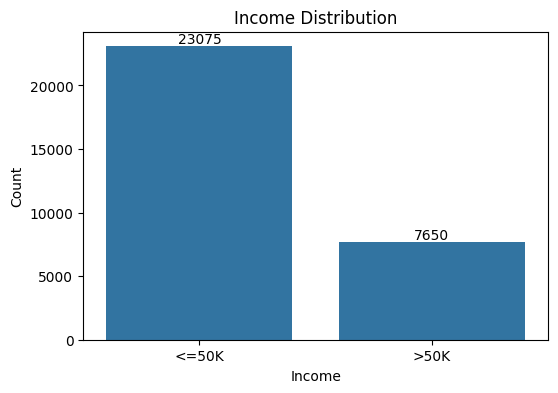

In [89]:
income_data=df['income'].value_counts()
order= list(income_data.index)

plt.figure(figsize=(6,4))
plot= sns.countplot(data=df, x='income', order=order)
plot.set_title('Income Distribution')
plot.set_xlabel('Income')
plot.set_ylabel('Count')


# Add value labels to the bars
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart."""
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + spacing,
                f'{int(height)}', ha='center', va='bottom')
add_value_labels(plot)
plt.show()


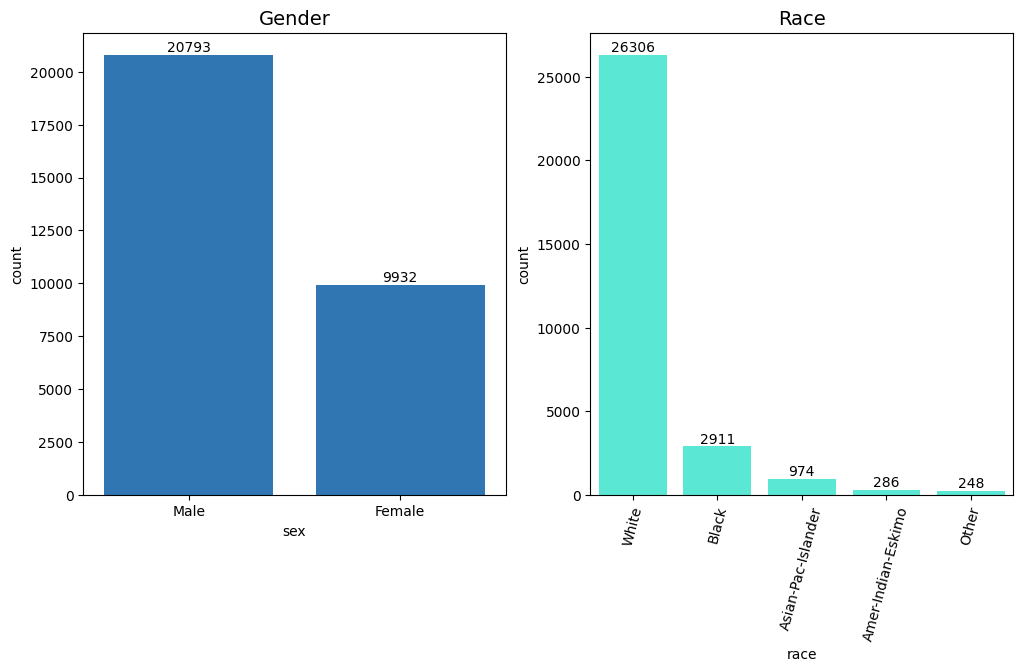

In [90]:
!pip install randomcolor --upgrade # Upgrade randomcolor to the latest version

import randomcolor
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of your code)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Gender', size=14)
rand_color = randomcolor.RandomColor()
# Remove the seed argument as it is not supported
plot=sns.countplot(data=df, x='sex', palette = rand_color.generate(count=1))
add_value_labels(plot)

# ... (rest of your code)

plt.subplot(1,2,2)
plt.title('Race', size=14)
# Remove the seed argument here as well
plot=sns.countplot(data=df, x='race', palette = rand_color.generate(count=1))
plt.xticks(rotation=75)
add_value_labels(plot)

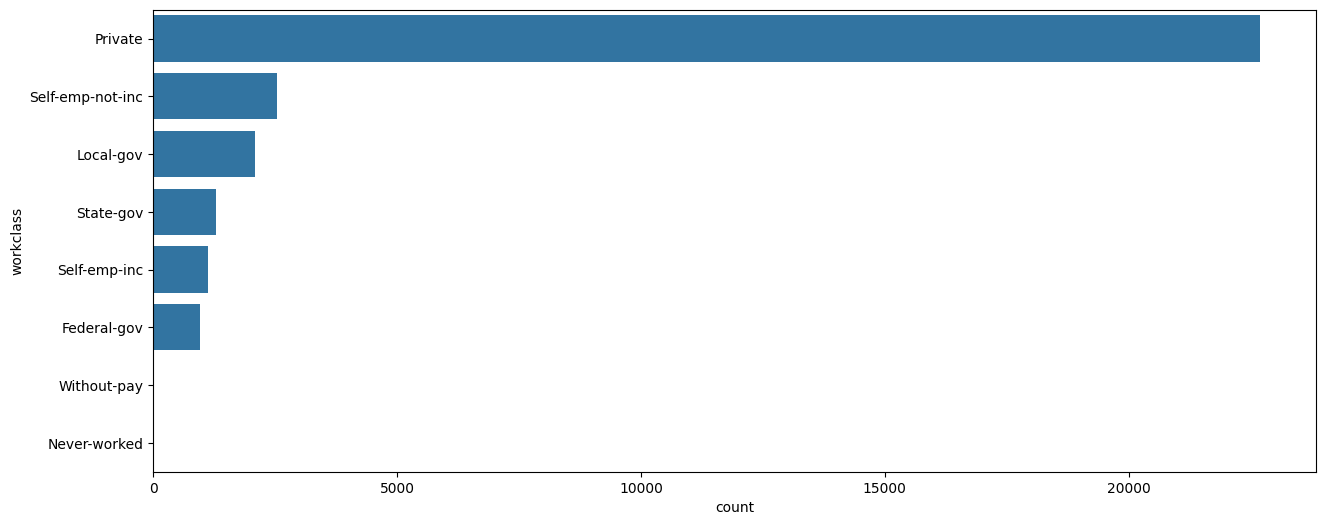

In [91]:
Workclass_data=df['workclass'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(15,6))
plot= sns.countplot(data=df, y='workclass', orient="h", order=order)

Based on the information provided in the search results, the corrected sentence would be:
The majority of people in the census dataset have jobs in the private sector. This suggests that the private sector is a significant employer in the economy. Self-employment is also relatively common, with over 1,800 people in the dataset classified as Self-emp-not-inc or Self-emp-inc. This suggests that there is a sizable number of people who are starting their own businesses or working for themselves. Government jobs, including state, local, and federal government, are less common compared to the private sector, but still represent a notable portion of the workforce.
The search results show that the "workclass" column, which indicates the type of employer, has the following distribution:
Private: 22,654 individuals
Self-emp-not-inc: 1,836 individuals
Self-emp-inc: 1,074 individuals
Federal-gov: 960 individuals
Local-gov: 1,298 individuals
State-gov: 1,298 individuals
This indicates that the private sector is the dominant employer, followed by self-employment and various levels of government. The relative proportions suggest that the private sector is the largest employer, self-employment is also significant, and government jobs, while less common, still make up a notable part of the workforce

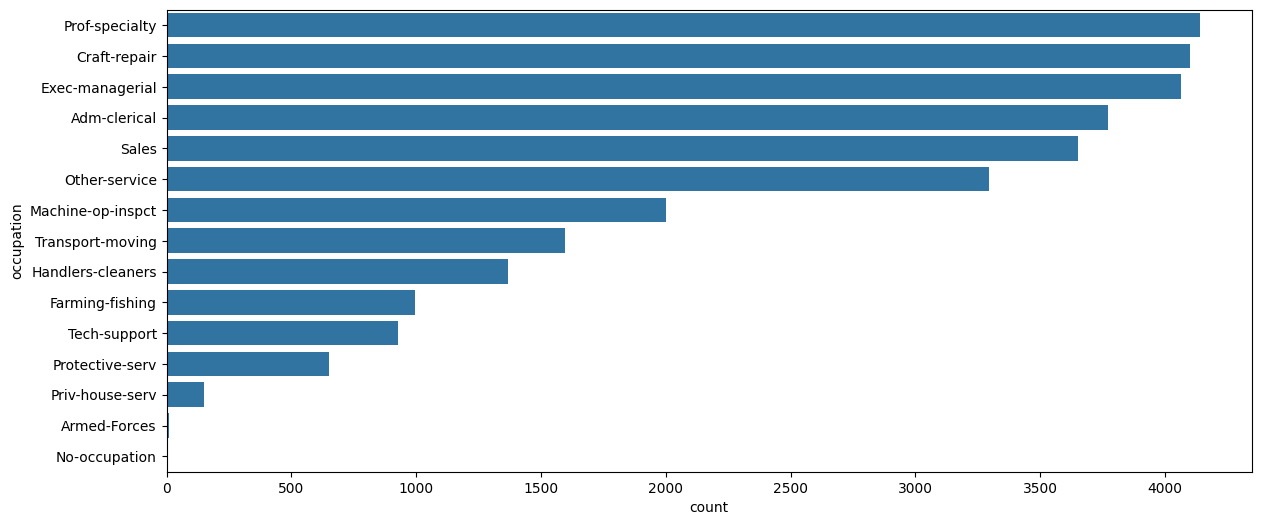

In [92]:
occupation_data=df['occupation'].value_counts()
order= list(occupation_data.index)

plt.figure(figsize=(14,6))
plot= sns.countplot(data=df, y='occupation', orient="h", order=order)

The majority of people are married or in a relationship.
There is a significant number of unmarried people and not-in-family.
There is a small number of people who are other relatives.

In [93]:
education_data=df['education'].value_counts()
order1= list(education_data.index)

EducationNum_data=df['education-num'].value_counts()
order2= list(education_data.index)

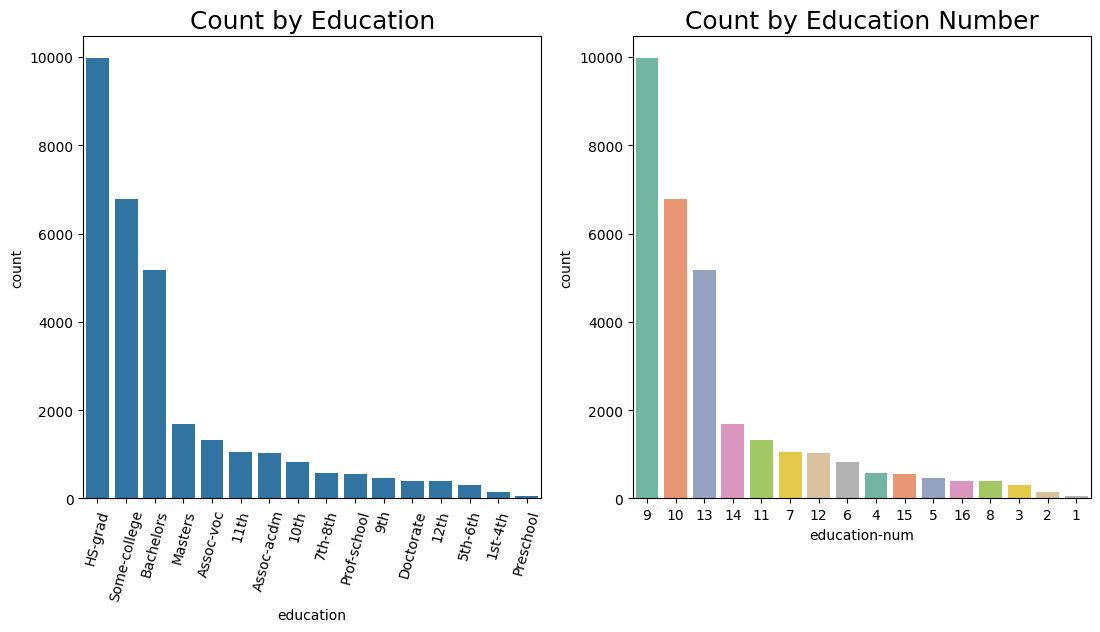

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('census-income.csv')

# Create a bar plot for 'education'
plt.figure(figsize=(13,6))

# Plot the count bar plot for 'education'
plt.subplot(1,2,1)
plot1 = sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75)

# Create a bar plot for 'education-num'
plt.subplot(1,2,2)
# Define a palette - you can choose from many available palettes
palette = "Set2"
plot2 = sns.countplot(data=df, x='education-num', order=df['education-num'].value_counts().index, palette=palette)
plt.title('Count by Education Number', fontsize=18)

plt.show()#

You can notice that the Education column related with education-num column Where:

HS-grad = 9 years of education completed.
Some-college = 10
Bachelors = 13
Masters = 14
Assoc-voc = 11 And So On..
We will drop Education column.

**One-hot encoding for categorical variables**

In [95]:

# Identify the categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the categorical columns
X_encoded = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with the encoded features
X_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df, X_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_cols, axis=1)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

    age    fnlwgt  education-num  hours-per-week  workclass_Federal-gov  \
0  39.0   77516.0           13.0            40.0                    0.0   
1  50.0   83311.0           13.0            13.0                    0.0   
2  38.0  215646.0            9.0            40.0                    0.0   
3  53.0  234721.0            7.0            40.0                    0.0   
4  28.0  338409.0           13.0            40.0                    0.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                  0.0                     0.0                0.0   
1                  0.0                     0.0                0.0   
2                  0.0                     0.0                1.0   
3                  0.0                     0.0                1.0   
4                  0.0                     0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  relationship_Wife  \
0                     0.0                         0.0

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
#df = pd.read_csv('census-income.csv')

# Identify the categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the encoded DataFrame
print(df.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  sex  hours-per-week  income  
0           0             1     4    1              40       0  
1           3             0     4    1              13       0  
2           5             1     4    1              40       0  
3           5             0     2    1              40       0  
4          10             5     2    0              40       0  


In [97]:
df.shape

(30725, 12)

In [98]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,6,77516,9,13,4,0,1,4,1,40,0
1,50,5,83311,9,13,2,3,0,4,1,13,0
2,38,3,215646,11,9,0,5,1,4,1,40,0
3,53,3,234721,1,7,2,5,0,2,1,40,0
4,28,3,338409,9,13,2,10,5,2,0,40,0


Splitting the  Dataset for Model Training and Evaluation

In [99]:
#Building models
#Spliting data

In [100]:
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24580, 11)
y_train shape: (24580,)
X_test shape: (6145, 11)
y_test shape: (6145,)


In [101]:
#Define models


In [102]:
Models = [

        ("SVM",      SVC()),     #Support Vector Machines

        ("kNN",      KNeighborsClassifier(n_neighbors = 3)),    #KNeighborsClassifier

        ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),   #Logistic Regression model

        ("DT_model", DecisionTreeClassifier(random_state=42)),    #Decision tree model

        ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),   #Random Forest model

        ("GradientBoosting",GradientBoostingClassifier(max_depth=2,     #GradientBoosting model
                                                      n_estimators=100))]


In [103]:
accuracies = {}
models = {}
model = Models
for name,model in Models:
    model.fit(X_train, y_train)
    models[name] = model
    acc = model.score(X_train, y_train)*100
    accuracies[name] = acc
    print("{} Accuracy Score : {:.3f}%".format(name,acc))

SVM Accuracy Score : 75.138%
kNN Accuracy Score : 83.356%
LR_model Accuracy Score : 75.138%
DT_model Accuracy Score : 100.000%
RF_model Accuracy Score : 100.000%
GradientBoosting Accuracy Score : 83.491%


In [104]:
models_res = pd.DataFrame(data=accuracies.items())
models_res.columns = ['Model','Test score']
models_res.sort_values('Test score',ascending=False)

,Model,Test score
3,DT_model,100.000000
4,RF_model,100.000000
5,GradientBoosting,83.490643
1,kNN,83.356387
0,SVM,75.138324
2,LR_model,75.138324


In [105]:
# Decision Tree
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

acc_train = round(DT_model.score(X_train, y_train) * 100, 2)
print(acc_train, "%")

acc_test = round(DT_model.score(X_test, y_test) * 100, 2)
print(acc_test, "%")

100.0 %
76.57 %


models  overfitted.

Tune paramerters to reduce the  overfitting.

In [106]:
DT_model = DecisionTreeClassifier(max_depth=40,
                                  max_features='auto',
                                  min_samples_leaf=40,
                                  min_samples_split=5,
                                  random_state=42)

DT_model.fit(X_train, y_train)

acc_train = round(DT_model.score(X_train, y_train) * 100, 2)
print(acc_train, "%")

acc_test = round(DT_model.score(X_test, y_test) * 100, 2)
print(acc_test, "%")

83.14 %
82.15 %


In [107]:
#Evaluate DT_model

In [108]:
Predictions = DT_model.predict(X_test)

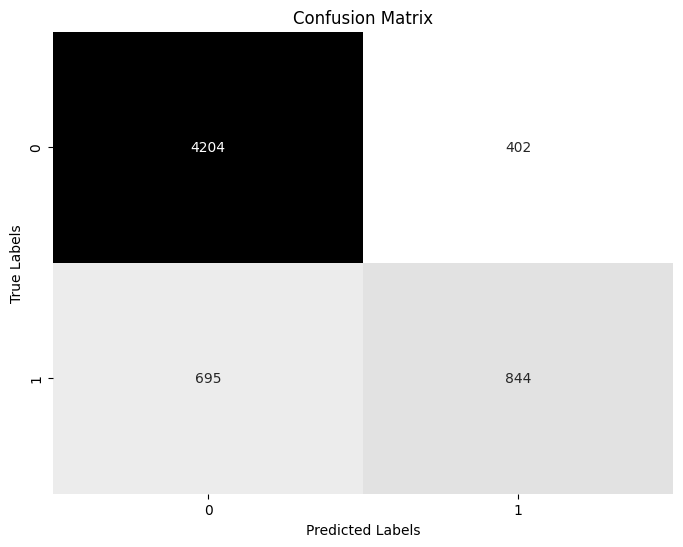

In [109]:
# Create a confusion matrix
cm = confusion_matrix(y_test, Predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="gray_r", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [110]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, Predictions, average='weighted')
recall = recall_score(y_test, Predictions, average='weighted')
f1 = f1_score(y_test, Predictions, average='weighted')

# Print evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Precision: 0.81
Recall: 0.82
F1-score: 0.81


In [111]:
#probabilities of our predictions
y_scores = DT_model.predict_proba(X_test)

Roc_Auc_Score = roc_auc_score(y_test, y_scores[:,1])
print("ROC-AUC-Score:", Roc_Auc_Score)

ROC-AUC-Score: 0.8710736088222357


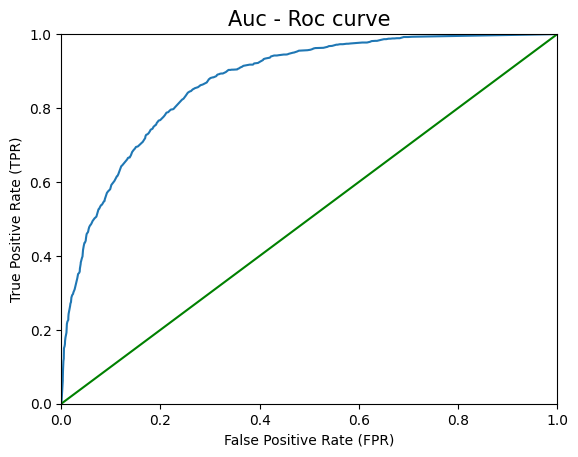

In [112]:
FPR, TPR, thresholds = roc_curve(y_test, y_scores[:,1])

plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], 'g')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Auc - Roc curve',fontsize=15);

The ROC AUC score is the metric corresponding to the ROC AUC curve, measuring the area under the curve (AUC). A higher score indicates better performance, with a maximum value of 1 representing perfect separation between classes."
